# A simple Client Credit Rating Model (Data Exploration)

https://www.kaggle.com/datasets/satyajeetrai/credit-risk-dataset/data

Released under MIT License

Copyright (c) 2013 Mark Otto.

Copyright (c) 2017 Andrew Fong.

### Import Libraries

In [370]:
import boto3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load from S3 Bucket

In [371]:
# Set bucket and file
bucket = 'creditriskgit'
file_key = 'dataset.csv'

# Load from S3
s3 = boto3.client('s3')
obj = s3.get_object(Bucket=bucket, Key=file_key)
df = pd.read_csv(obj['Body'])
df

,id,Duration in months,Credit history,Purpose of the credit,Credit amount,Status of savings account/bonds,Present employment(years),Installment rate in percentage of disposable income,personal_status,Other debtors / guarantors,...,Property,Age in years,Other installment plans (banks/stores),Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Status of existing checking account
0,1,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,997,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,998,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,999,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


### Show every column

In [372]:
print(list(df.columns))

['id', 'Duration in months', 'Credit history', 'Purpose of the credit', 'Credit amount', 'Status of savings account/bonds', 'Present employment(years)', 'Installment rate in percentage of disposable income', 'personal_status', 'Other debtors / guarantors', 'Present residence since X years', 'Property', 'Age in years', 'Other installment plans (banks/stores)', 'Housing', 'Number of existing credits at this bank', 'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'Foreign worker', 'Status of existing checking account']


In [373]:
df.isna().sum()

id                                                          0
Duration in months                                          0
Credit history                                              0
Purpose of the credit                                       0
Credit amount                                               0
Status of savings account/bonds                             0
Present employment(years)                                   0
Installment rate in percentage of disposable income         0
personal_status                                             0
Other debtors / guarantors                                  0
Present residence since X years                             0
Property                                                    0
Age in years                                                0
Other installment plans (banks/stores)                      0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

### Change categorical variables to numeric

#### Credit history

In [374]:
print(df['Credit history'].head(10))
print("\n", df['Credit history'].unique())

0    critical/other existing credit
1                     existing paid
2    critical/other existing credit
3                     existing paid
4                delayed previously
5                     existing paid
6                     existing paid
7                     existing paid
8                     existing paid
9    critical/other existing credit
Name: Credit history, dtype: object

 ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']


In [375]:
mapping = {
    'critical/other existing credit': -2,
    'delayed previously': -1,
    'existing paid':1,
    'no credits/all paid': 2,
    'all paid': 5

}
df['Credit history'] = df['Credit history'].map(mapping)
print(df['Credit history'].head(10))

0   -2
1    1
2   -2
3    1
4   -1
5    1
6    1
7    1
8    1
9   -2
Name: Credit history, dtype: int64


#### *Purpose of the credit is is not ordinal data

#### Status of savings account/bonds

In [376]:
print(df['Status of savings account/bonds'].head(10))
print("\n", df['Status of savings account/bonds'].unique())

0    no known savings
1                <100
2                <100
3                <100
4                <100
5    no known savings
6         500<=X<1000
7                <100
8              >=1000
9                <100
Name: Status of savings account/bonds, dtype: object

 ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']


In [377]:
mapping = {
    'no known savings': -1,
    '<100': 0,
    '100<=X<500': 1,  
    '500<=X<1000': 2,
    '>=1000': 3
}
df['Status of savings account/bonds'] = df['Status of savings account/bonds'].map(mapping)
print(df['Status of savings account/bonds'].head(10))

0   -1
1    0
2    0
3    0
4    0
5   -1
6    2
7    0
8    3
9    0
Name: Status of savings account/bonds, dtype: int64


#### Present employment(years)

In [378]:
print(df['Present employment(years)'].head(10))
print("\n", df['Present employment(years)'].unique())

0           >=7
1        1<=X<4
2        4<=X<7
3        4<=X<7
4        1<=X<4
5        1<=X<4
6           >=7
7        1<=X<4
8        4<=X<7
9    unemployed
Name: Present employment(years), dtype: object

 ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']


In [379]:
mapping = {
    'unemployed': -1,
    '<1': 0,
    '1<=X<4': 1,  
    '4<=X<7': 2,
    '>=7': 3
}
df['Present employment(years)'] = df['Present employment(years)'].map(mapping)
print(df['Present employment(years)'].head(10))

0    3
1    1
2    2
3    2
4    1
5    1
6    3
7    1
8    2
9   -1
Name: Present employment(years), dtype: int64


#### Personal status

In [380]:
print(df['personal_status'].head(10))
print("\n", df['personal_status'].unique())

0           male single
1    female div/dep/mar
2           male single
3           male single
4           male single
5           male single
6           male single
7           male single
8          male div/sep
9          male mar/wid
Name: personal_status, dtype: object

 ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']


In [381]:
#Dropping collumn as it lacks diverse data.
df = df.drop(['personal_status'], axis=1)

#### Other debtors / guarantors	

In [382]:
print(df['Other debtors / guarantors'].head(10))
print("\n", df['Other debtors / guarantors'].unique())

0         none
1         none
2         none
3    guarantor
4         none
5         none
6         none
7         none
8         none
9         none
Name: Other debtors / guarantors, dtype: object

 ['none' 'guarantor' 'co applicant']


In [383]:
# Grouping by yes or no
mapping = {
    'none': -1,
    'guarantor': 1,
    'co applicant': 1
}
df['Other debtors / guarantors'] = df['Other debtors / guarantors'].map(mapping)
print(df['Other debtors / guarantors'].head(10))

0   -1
1   -1
2   -1
3    1
4   -1
5   -1
6   -1
7   -1
8   -1
9   -1
Name: Other debtors / guarantors, dtype: int64


#### Property

In [384]:
print(df['Property'].head(10))
print("\n", df['Property'].unique())

0          real estate
1          real estate
2          real estate
3       life insurance
4    no known property
5    no known property
6       life insurance
7                  car
8          real estate
9                  car
Name: Property, dtype: object

 ['real estate' 'life insurance' 'no known property' 'car']


In [385]:
# Since they are mutually exclussive i choose "life insurance" above "car"
mapping = {
    'no known property': -1,
    'car': 1,
    'life insurance': 2,
    'real estate': 3
}
df['Property'] = df['Property'].map(mapping)
print(df['Property'].head(10))

0    3
1    3
2    3
3    2
4   -1
5   -1
6    2
7    1
8    3
9    1
Name: Property, dtype: int64


#### Other installment plans (banks/stores)

In [386]:
print(df['Other installment plans (banks/stores)'].head(10))
print("\n", df['Other installment plans (banks/stores)'].unique())

0    none
1    none
2    none
3    none
4    none
5    none
6    none
7    none
8    none
9    none
Name: Other installment plans (banks/stores), dtype: object

 ['none' 'bank' 'stores']


In [387]:
# We will gouup the to yes and no
mapping = {
    'none': -1,
    'bank': 1,
    'stores': 1
}
df['Other installment plans (banks/stores)'] = df['Other installment plans (banks/stores)'].map(mapping)
print(df['Other installment plans (banks/stores)'].head(10))

0   -1
1   -1
2   -1
3   -1
4   -1
5   -1
6   -1
7   -1
8   -1
9   -1
Name: Other installment plans (banks/stores), dtype: int64


#### Housing

In [388]:
print(df['Housing'].head(10))
print("\n", df['Housing'].unique())

0         own
1         own
2         own
3    for free
4    for free
5    for free
6         own
7        rent
8         own
9         own
Name: Housing, dtype: object

 ['own' 'for free' 'rent']


In [389]:
mapping = {
    'rent': -2,
    'for free': -1,
    'own': 5
}
df['Housing'] = df['Housing'].map(mapping)
print(df['Housing'].head(10))

0    5
1    5
2    5
3   -1
4   -1
5   -1
6    5
7   -2
8    5
9    5
Name: Housing, dtype: int64


#### Status of existing checking account

In [390]:
print(df['Status of existing checking account'].head(10))
print("\n", df['Status of existing checking account'].unique())

0    good
1     bad
2    good
3    good
4     bad
5    good
6    good
7    good
8    good
9     bad
Name: Status of existing checking account, dtype: object

 ['good' 'bad']


In [391]:
mapping = {
    'bad': -1,
    'good': 1
}
df['Status of existing checking account'] = df['Status of existing checking account'].map(mapping)
print(df['Status of existing checking account'].head(10))

0    1
1   -1
2    1
3    1
4   -1
5    1
6    1
7    1
8    1
9   -1
Name: Status of existing checking account, dtype: int64


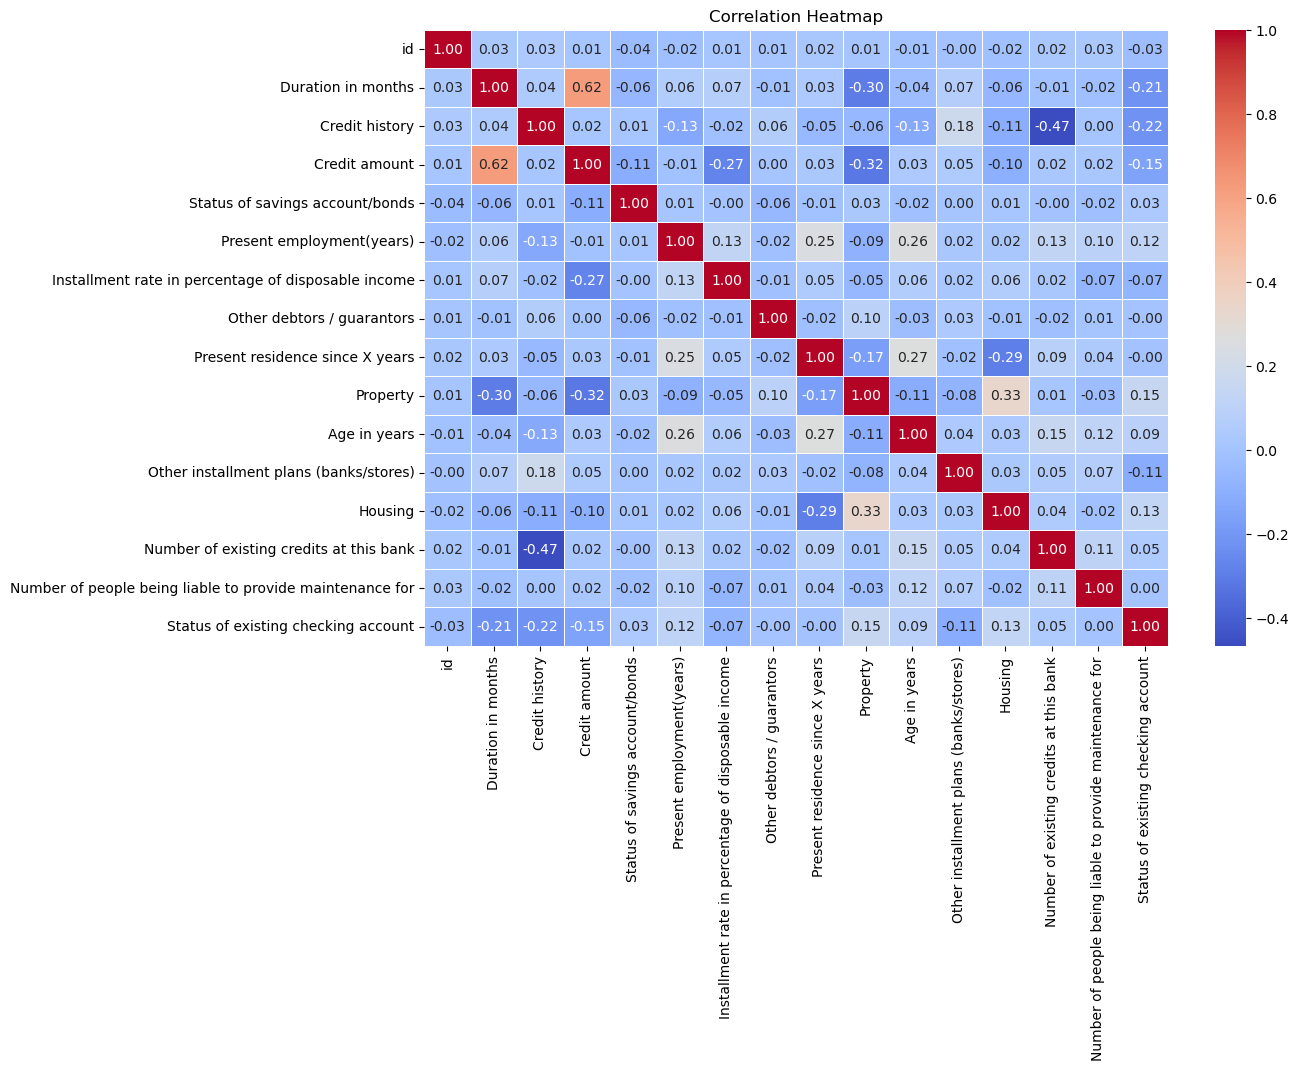

In [392]:
corr = df.corr(numeric_only=True)  # Get correlation of numeric columns

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Our data quantification might not be completetly accurate but do reveal correlations

#### Connections that we will use when we select predictive variables